#LOAD DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/uji_Ahsan/Dataset'

Mounted at /content/drive


#IMPORT LIBRARY

In [3]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import Input
from tensorflow.keras.layers import  MaxPooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, Add, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D, Activation
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision,SensitivityAtSpecificity, SpecificityAtSensitivity, Metric, TruePositives,FalseNegatives, Recall
from tensorflow.keras.models import load_model
from keras.models import load_model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
from keras.applications.vgg19 import preprocess_input
from sklearn.utils import shuffle, resample
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping, ModelCheckpoint,CSVLogger, ReduceLROnPlateau, LearningRateScheduler
import datetime
from sklearn.metrics import accuracy_score, classification_report
from keras import backend as K
import random
from sklearn.model_selection import train_test_split,  StratifiedShuffleSplit
!pip install pycm==3.1
%load_ext tensorboard
from pycm import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.7/595.7 KB 23.7 MB/s eta 0:00:00


#LABELLING

In [4]:
df = None
for label in os.listdir(data_dir):
  data = []
  for img_filename in os.listdir(data_dir + '/' + label):
    filename, ext = os.path.splitext(img_filename)
    label_folder = os.path.join(data_dir, label)
    src_img_filepath = os.path.join(label_folder, img_filename)
    data.append(src_img_filepath)
  new_df = pd.DataFrame(data, columns=['path',])
  new_df['label'] = label
  df = pd.concat([df, new_df])
df

,path,label
0,/content/drive/MyDrive/uji_Ahsan/Dataset/Measl...,Measles_augmented
1,/content/drive/MyDrive/uji_Ahsan/Dataset/Measl...,Measles_augmented
2,/content/drive/MyDrive/uji_Ahsan/Dataset/Measl...,Measles_augmented
3,/content/drive/MyDrive/uji_Ahsan/Dataset/Measl...,Measles_augmented
4,/content/drive/MyDrive/uji_Ahsan/Dataset/Measl...,Measles_augmented
...,...,...
547,/content/drive/MyDrive/uji_Ahsan/Dataset/Norma...,Normal_image_augmented
548,/content/drive/MyDrive/uji_Ahsan/Dataset/Norma...,Normal_image_augmented
549,/content/drive/MyDrive/uji_Ahsan/Dataset/Norma...,Normal_image_augmented
550,/content/drive/MyDrive/uji_Ahsan/Dataset/Norma...,Normal_image_augmented


#SPLIT DATASET FOR CV

In [5]:
df_train_val, df_test = train_test_split(df, random_state=666, test_size=0.1 )
df_train_val.to_csv('/content/drive/MyDrive/uji_Ahsan/train_label.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/uji_Ahsan/test_label.csv', index=False)
image_size=(224, 224)

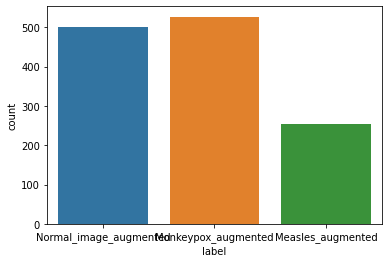

In [6]:
ax = sns.countplot(x="label", data=df_train_val,)
plt.show()

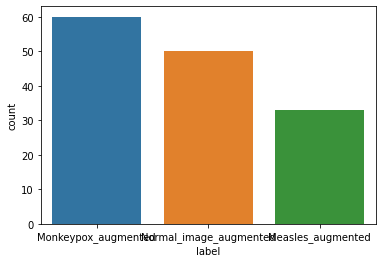

In [6]:
ax = sns.countplot(x="label", data=df_test,)
plt.show()

#IMPORT MODEL

In [7]:
model = keras.Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (224, 224, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating third block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fourth block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))

# Creating an output layer
model.add(Dense(units= 3, activation='softmax'))

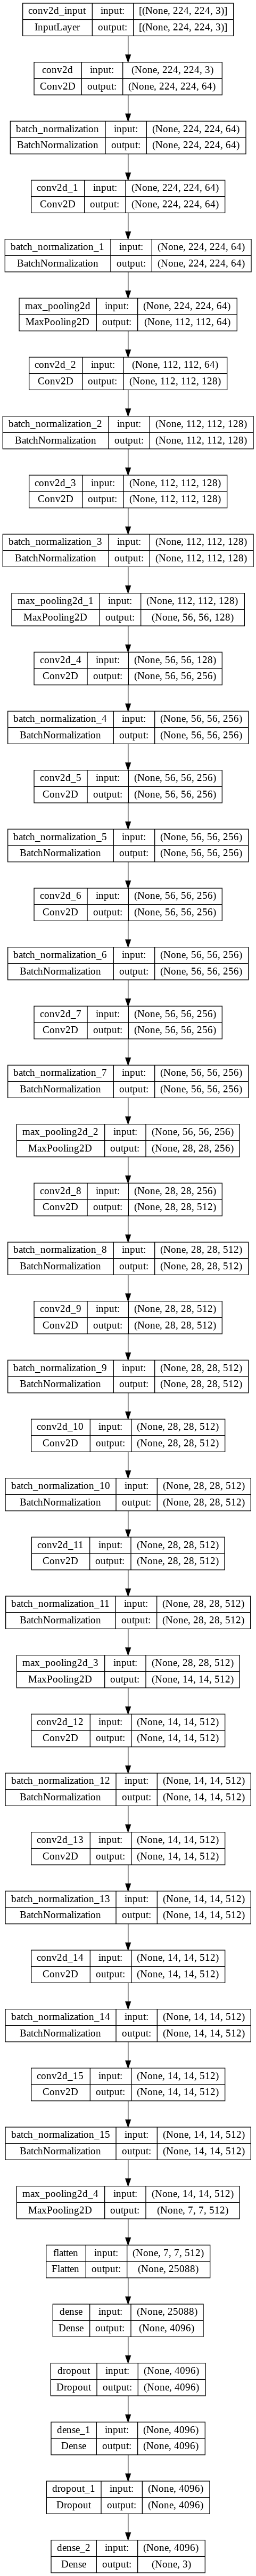

In [8]:
plot_model(model = model, show_shapes = True)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

#PROSES AUGMENTASI DATA

In [8]:
datagen = ImageDataGenerator(rescale=1./255,)
train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val, 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 

class_names = train_generator.class_indices
print(class_names)
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  # print(image_batch[0].shape)
  # zz.fit(image_batch)
  break

Found 1282 validated image filenames belonging to 3 classes.
{'Measles_augmented': 0, 'Monkeypox_augmented': 1, 'Normal_image_augmented': 2}
(32, 224, 224, 3)
(32, 3)


#PELATIHAN MODEL

In [9]:
def cross_validation_model_evaluate(model,  valData, i):
  val_datagen = ImageDataGenerator(rescale=1./255,)
  valData = df_train_val.iloc[val_index]
  val_generator = val_datagen.flow_from_dataframe(
        dataframe=valData,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )

  Y_pred = model.predict(val_generator,)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test = val_generator.classes
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
  print(cm)
  eval_csv = '/content/drive/MyDrive/uji_Ahsan/' +"Model/" + '_fold_' + str(i) + '_model.log'
  eval_csv = pd.read_csv(eval_csv, )
  plt.plot(eval_csv['accuracy'])
  plt.plot(eval_csv['loss'])
  plt.plot(eval_csv['val_accuracy'])
  plt.plot(eval_csv['val_loss'])
  plt.title('model performance')
  plt.ylabel('accuracy / loss')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy', 'train_loss', 'val_accuracy', 'val_loss'], loc='upper left')
  plt.show()
  eval_csv = eval_csv[(eval_csv.val_accuracy == eval_csv.val_accuracy.max())]
  eval_csv = eval_csv[(eval_csv.val_loss== eval_csv.val_loss.min())]
  print(eval_csv)

#PENGUJIAN MODEL K_FOLD

##SKEN 1

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1153, 2)
val shape: (129, 2)
Found 1153 validated image filenames belonging to 3 classes.
Found 129 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 3.4629 - accuracy: 0.5100 
Epoch 1: val_accuracy improved from -inf to 0.40310, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_1_model.h5
37/37 [==============================] - 530s 14s/step - loss: 3.4629 - accuracy: 0.5100 - val_loss: 1.7543 - val_accuracy: 0.4031
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 1.3650 - accuracy: 0.6505
Epoch 2: val_accuracy did not improve from 0.40310
37/37 [==============================] - 29s 779ms/step - loss: 1.3650 - accuracy: 0.6505 - val_loss: 1.6357 - val_accuracy: 0.4031
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 1.2791 - accuracy: 0.6748
Epoch 3: val_accuracy did not improve from 0.40310
37/37 [==============================] - 24s 627ms/step - lo

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 171ms/step
Predict  0        1        2        
Actual
0        11       12       3        

1        11       37       4        

2        0        1        50       





Overall Statistics : 

95% CI                                                            (0.68596,0.83342)
ACC Macro                                                         0.83979
ARI                                                               0.52132
AUNP                                                              0.81731
AUNU                                                              0.79161
Bangdiwala B                                                      0.65636
Bennett S                                                         0.63953
CBA                                                               0.6706
CSI                                                               0.41073
Chi-Squared                

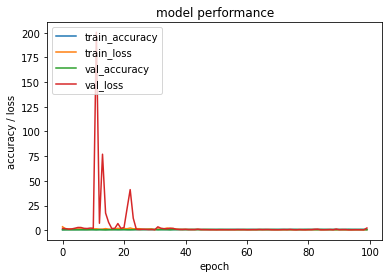

    epoch  accuracy      loss  val_accuracy  val_loss
84     84  0.748482  0.492778      0.813953  0.399183


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 2

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1153, 2)
val shape: (129, 2)
Found 1153 validated image filenames belonging to 3 classes.
Found 129 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.7060
Epoch 1: val_accuracy improved from -inf to 0.56589, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_2_model.h5
37/37 [==============================] - 58s 2s/step - loss: 0.6789 - accuracy: 0.7060 - val_loss: 1.1042 - val_accuracy: 0.5659
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.7583 - accuracy: 0.6860
Epoch 2: val_accuracy improved from 0.56589 to 0.58915, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_2_model.h5
37/37 [==============================] - 34s 919ms/step - loss: 0.7583 - accuracy: 0.6860 - val_loss: 0.8159 - val_accuracy: 0.5891
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.7989 - accuracy: 0.6904
Epoch 3: val_accuracy improved from 0

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 91s 17s/step
Predict  0        1        2        
Actual
0        10       13       3        

1        8        39       5        

2        0        0        51       





Overall Statistics : 

95% CI                                                            (0.70315,0.84723)
ACC Macro                                                         0.85013
ARI                                                               0.54447
AUNP                                                              0.82547
AUNU                                                              0.79759
Bangdiwala B                                                      0.68306
Bennett S                                                         0.66279
CBA                                                               0.66634
CSI                                                               0.43486
Chi-Squared                

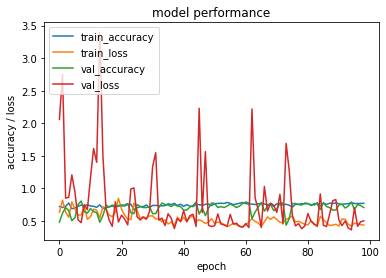

   epoch  accuracy      loss  val_accuracy  val_loss
7      7  0.743278  0.592089      0.806202  0.473631


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 2
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 3

In [15]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.5582 - accuracy: 0.7565
Epoch 1: val_accuracy improved from -inf to 0.67188, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_3_model.h5
37/37 [==============================] - 34s 871ms/step - loss: 0.5582 - accuracy: 0.7565 - val_loss: 0.7809 - val_accuracy: 0.6719
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.7262
Epoch 2: val_accuracy did not improve from 0.67188
37/37 [==============================] - 26s 702ms/step - loss: 0.6625 - accuracy: 0.7262 - val_loss: 0.7625 - val_accuracy: 0.6719
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.7496
Epoch 3: val_accuracy did not improve from 0.67188
37/37 [==============================] - 24s 652ms/step - lo

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 182ms/step
Predict  0        1        2        
Actual
0        14       11       1        

1        12       33       7        

2        0        1        50       





Overall Statistics : 

95% CI                                                            (0.67741,0.82647)
ACC Macro                                                         0.83463
ARI                                                               0.49291
AUNP                                                              0.81254
AUNU                                                              0.79643
Bangdiwala B                                                      0.63358
Bennett S                                                         0.62791
CBA                                                               0.67838
CSI                                                               0.42911
Chi-Squared               

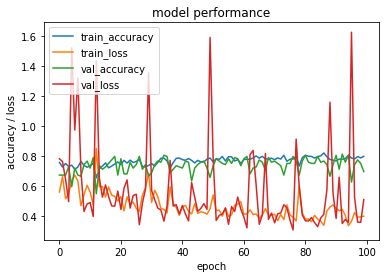

    epoch  accuracy      loss  val_accuracy  val_loss
92     92  0.778163  0.442553        0.8125  0.347664


In [16]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 3
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 4

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 3.5667 - accuracy: 0.5182 
Epoch 1: val_accuracy improved from -inf to 0.19531, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_4_model.h5
37/37 [==============================] - 639s 17s/step - loss: 3.5667 - accuracy: 0.5182 - val_loss: 1.7574 - val_accuracy: 0.1953
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 2.2388 - accuracy: 0.5589
Epoch 2: val_accuracy did not improve from 0.19531
37/37 [==============================] - 28s 750ms/step - loss: 2.2388 - accuracy: 0.5589 - val_loss: 1.3022 - val_accuracy: 0.1953
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 1.6983 - accuracy: 0.6231
Epoch 3: val_accuracy improved from 0.19531 to 0.25000, saving model to /content/drive/MyDrive/uji_Ahsan/Model/

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 2s 392ms/step
Predict  0        1        2        
Actual
0        3        23       0        

1        7        39       6        

2        0        0        51       





Overall Statistics : 

95% CI                                                            (0.64353,0.79833)
ACC Macro                                                         0.81395
ARI                                                               0.5342
AUNP                                                              0.77821
AUNU                                                              0.73697
Bangdiwala B                                                      0.64638
Bennett S                                                         0.5814
CBA                                                               0.54638
CSI                                                               0.22972
Chi-Squared                 

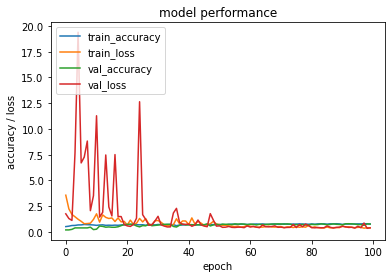

    epoch  accuracy      loss  val_accuracy  val_loss
92     92  0.761698  0.501846      0.796875   0.43654


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 4
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 5

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.6348 - accuracy: 0.7097
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_5_model.h5
37/37 [==============================] - 35s 879ms/step - loss: 0.6348 - accuracy: 0.7097 - val_loss: 2.0512 - val_accuracy: 0.5625
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.7340
Epoch 2: val_accuracy did not improve from 0.56250
37/37 [==============================] - 26s 680ms/step - loss: 0.6189 - accuracy: 0.7340 - val_loss: 1.5162 - val_accuracy: 0.4375
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.6257 - accuracy: 0.7227
Epoch 3: val_accuracy improved from 0.56250 to 0.63281, saving model to /content/drive/MyDrive/uji_Ahsan/Model/

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 2s 226ms/step
Predict  0        1        2        
Actual
0        11       14       1        

1        15       37       0        

2        0        0        51       





Overall Statistics : 

95% CI                                                            (0.69454,0.84035)
ACC Macro                                                         0.84496
ARI                                                               0.61143
AUNP                                                              0.82987
AUNU                                                              0.79906
Bangdiwala B                                                      0.68411
Bennett S                                                         0.65116
CBA                                                               0.70513
CSI                                                               0.42132
Chi-Squared               

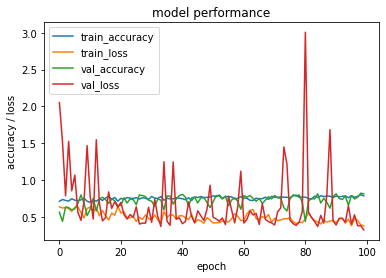

    epoch  accuracy      loss  val_accuracy  val_loss
98     98  0.800693  0.391283      0.820312  0.379225


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 5
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 6

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 4.4855 - accuracy: 0.5069
Epoch 1: val_accuracy improved from -inf to 0.41406, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_6_model.h5
37/37 [==============================] - 282s 7s/step - loss: 4.4855 - accuracy: 0.5069 - val_loss: 2.7055 - val_accuracy: 0.4141
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 1.5630 - accuracy: 0.5962
Epoch 2: val_accuracy did not improve from 0.41406
37/37 [==============================] - 25s 668ms/step - loss: 1.5630 - accuracy: 0.5962 - val_loss: 1.1357 - val_accuracy: 0.4141
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 1.2216 - accuracy: 0.6508
Epoch 3: val_accuracy did not improve from 0.41406
37/37 [==============================] - 25s 656ms/step - loss

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 2s 387ms/step
Predict  0        1        2        
Actual
0        13       13       0        

1        8        39       5        

2        0        0        51       





Overall Statistics : 

95% CI                                                            (0.72922,0.86768)
ACC Macro                                                         0.86563
ARI                                                               0.58605
AUNP                                                              0.8447
AUNU                                                              0.82323
Bangdiwala B                                                      0.70275
Bennett S                                                         0.69767
CBA                                                               0.72024
CSI                                                               0.50992
Chi-Squared                

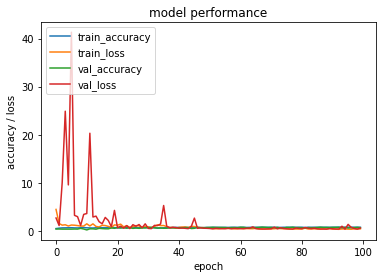

    epoch  accuracy      loss  val_accuracy  val_loss
67     67   0.79636  0.399306      0.796875  0.426119


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 6
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 7

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.7387 - accuracy: 0.7045
Epoch 1: val_accuracy improved from -inf to 0.73438, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_7_model.h5
37/37 [==============================] - 35s 903ms/step - loss: 0.7387 - accuracy: 0.7045 - val_loss: 0.6278 - val_accuracy: 0.7344
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.6090 - accuracy: 0.7201
Epoch 2: val_accuracy did not improve from 0.73438
37/37 [==============================] - 26s 696ms/step - loss: 0.6090 - accuracy: 0.7201 - val_loss: 0.6234 - val_accuracy: 0.6797
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.7132
Epoch 3: val_accuracy did not improve from 0.73438
37/37 [==============================] - 25s 663ms/step - lo

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 167ms/step
Predict  0        1        2        
Actual
0        6        20       0        

1        7        44       1        

2        0        1        50       





Overall Statistics : 

95% CI                                                            (0.70315,0.84723)
ACC Macro                                                         0.85013
ARI                                                               0.60134
AUNP                                                              0.82325
AUNU                                                              0.78397
Bangdiwala B                                                      0.70771
Bennett S                                                         0.66279
CBA                                                               0.62936
CSI                                                               0.39206
Chi-Squared               

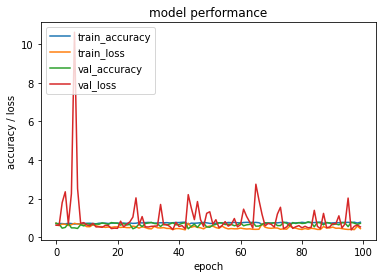

    epoch  accuracy      loss  val_accuracy  val_loss
82     82  0.775563  0.420677      0.804688  0.495725


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 7
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 8

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.4852 - accuracy: 0.7686
Epoch 1: val_accuracy improved from -inf to 0.75781, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_8_model.h5
37/37 [==============================] - 42s 1s/step - loss: 0.4852 - accuracy: 0.7686 - val_loss: 0.4979 - val_accuracy: 0.7578
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.7756
Epoch 2: val_accuracy did not improve from 0.75781
37/37 [==============================] - 26s 702ms/step - loss: 0.4099 - accuracy: 0.7756 - val_loss: 0.8109 - val_accuracy: 0.6328
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.4867 - accuracy: 0.7556
Epoch 3: val_accuracy did not improve from 0.75781
37/37 [==============================] - 25s 658ms/step - loss:

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 2s 218ms/step
Predict  0        1        2        
Actual
0        4        22       0        

1        7        42       3        

2        0        0        51       





Overall Statistics : 

95% CI                                                            (0.67741,0.82647)
ACC Macro                                                         0.83463
ARI                                                               0.58588
AUNP                                                              0.80393
AUNU                                                              0.76157
Bangdiwala B                                                      0.68797
Bennett S                                                         0.62791
CBA                                                               0.58485
CSI                                                               0.30862
Chi-Squared               

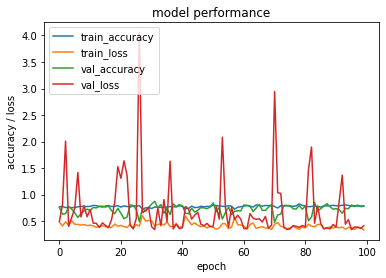

    epoch  accuracy      loss  val_accuracy  val_loss
31     31  0.768631  0.411563         0.875  0.342836


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 8
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 9

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.4592 - accuracy: 0.7886
Epoch 1: val_accuracy improved from -inf to 0.54688, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_9_model.h5
37/37 [==============================] - 35s 874ms/step - loss: 0.4592 - accuracy: 0.7886 - val_loss: 2.5056 - val_accuracy: 0.5469
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.7834
Epoch 2: val_accuracy improved from 0.54688 to 0.71094, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_9_model.h5
37/37 [==============================] - 35s 929ms/step - loss: 0.4857 - accuracy: 0.7834 - val_loss: 0.4771 - val_accuracy: 0.7109
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.4188 - accuracy: 0.7721
Epoch 3: val_accuracy improved fro

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 169ms/step
Predict  0        1        2        
Actual
0        16       10       0        

1        10       40       2        

2        1        1        49       





Overall Statistics : 

95% CI                                                            (0.7468,0.88111)
ACC Macro                                                         0.87597
ARI                                                               0.60405
AUNP                                                              0.86235
AUNU                                                              0.84502
Bangdiwala B                                                      0.71486
Bennett S                                                         0.72093
CBA                                                               0.7742
CSI                                                               0.56103
Chi-Squared                 

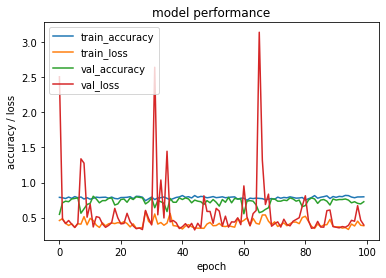

    epoch  accuracy      loss  val_accuracy  val_loss
11     11  0.775563  0.458596      0.804688  0.366928


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 9
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 10

In [12]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1154, 2)
val shape: (128, 2)
Found 1154 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 4.4745 - accuracy: 0.5121
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to /content/drive/MyDrive/uji_Ahsan/Model/_fold_10_model.h5
37/37 [==============================] - 294s 8s/step - loss: 4.4745 - accuracy: 0.5121 - val_loss: 1.4461 - val_accuracy: 0.4062
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 1.2231 - accuracy: 0.6620
Epoch 2: val_accuracy did not improve from 0.40625
37/37 [==============================] - 27s 729ms/step - loss: 1.2231 - accuracy: 0.6620 - val_loss: 1.1654 - val_accuracy: 0.4062
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 1.2005 - accuracy: 0.6473
Epoch 3: val_accuracy did not improve from 0.40625
37/37 [==============================] - 26s 688ms/step - los

###EVAL

Found 129 validated image filenames belonging to 3 classes.
5/5 [==============================] - 2s 392ms/step
Predict  0        1        2        
Actual
0        12       14       0        

1        9        42       1        

2        0        3        48       





Overall Statistics : 

95% CI                                                            (0.7205,0.8609)
ACC Macro                                                         0.86047
ARI                                                               0.56816
AUNP                                                              0.83951
AUNU                                                              0.8149
Bangdiwala B                                                      0.68902
Bennett S                                                         0.68605
CBA                                                               0.70486
CSI                                                               0.4911
Chi-Squared                   

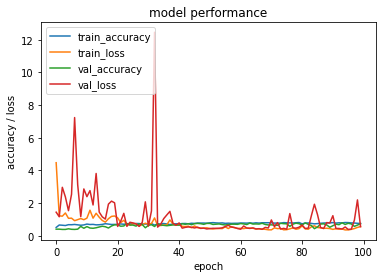

    epoch  accuracy      loss  val_accuracy  val_loss
93     93  0.791161  0.417347      0.796875  0.413325


In [13]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 10
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    model_filepath = '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

#HASIL SELURUH PENGUJIAN K-FOLD

In [17]:
df_result_experiment = pd.DataFrame()
for i in range(1, 11):
  df_result = pd.read_csv('/content/drive/MyDrive/uji_Ahsan/' +"Model/" + '_fold_' + str(i) + '_model.log')
  df_result = df_result[(df_result.val_accuracy == df_result.val_accuracy.max())]
  df_result = df_result[(df_result.val_loss== df_result.val_loss.min())]
  df_result_experiment = pd.concat([df_result_experiment, df_result])


df_result_experiment = df_result_experiment.reset_index(drop=True)
df_result_experiment.index += 1
pd.set_option('display.max_rows', df_result_experiment.shape[0]+1)
df_average =df_result_experiment.iloc[:].mean(axis=0)
df_result_experiment.loc[11] = df_average
df_result_experiment = df_result_experiment.style.background_gradient(cmap='Accent', subset=df_result_experiment.index[-1])
df_result_experiment

,epoch,accuracy,loss,val_accuracy,val_loss
1,84.000000,0.748482,0.492778,0.813953,0.399183
2,89.000000,0.755421,0.441358,0.806202,0.414591
3,92.000000,0.778163,0.442553,0.812500,0.347664
4,92.000000,0.761698,0.501846,0.796875,0.436540
5,98.000000,0.800693,0.391283,0.820312,0.379225
6,67.000000,0.796360,0.399306,0.796875,0.426119
7,82.000000,0.775563,0.420677,0.804688,0.495725
8,31.000000,0.768631,0.411563,0.875000,0.342836
9,11.000000,0.775563,0.458596,0.804688,0.366928
10,93.000000,0.791161,0.417347,0.796875,0.413325


#PENGUJIAN UNSEEN DATA

##SKEN 1

In [18]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '1' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 26s 6s/step
Predict  0        1        2        
Actual
0        8        22       3        

1        8        49       3        

2        0        2        48       





Overall Statistics : 

95% CI                                                            (0.66187,0.80667)
ACC Macro                                                         0.82284
ARI                                                               0.47812
AUNP                                                              0.7868
AUNU                                                              0.76545
Bangdiwala B                                                      0.62684
Bennett S                                                         0.6014
CBA                                                               0.60085
CSI                                                               0.35974
Chi-Squared                   

##SKEN 2

In [19]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 168ms/step
Predict  0        1        2        
Actual
0        4        29       0        

1        4        53       3        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.67711,0.81939)
ACC Macro                                                         0.83217
ARI                                                               0.5569
AUNP                                                              0.79099
AUNU                                                              0.76442
Bangdiwala B                                                      0.67973
Bennett S                                                         0.62238
CBA                                                               0.57032
CSI                                                               0.36476
Chi-Squared                

##SKEN 3

In [20]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '3' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 166ms/step
Predict  0        1        2        
Actual
0        17       16       0        

1        18       37       5        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.65428,0.80027)
ACC Macro                                                         0.81818
ARI                                                               0.48463
AUNP                                                              0.79491
AUNU                                                              0.78694
Bangdiwala B                                                      0.58687
Bennett S                                                         0.59091
CBA                                                               0.67049
CSI                                                               0.40825
Chi-Squared               

##SKEN 4

In [21]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '4' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 166ms/step
Predict  0        1        2        
Actual
0        3        29       1        

1        5        51       4        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.65428,0.80027)
ACC Macro                                                         0.81818
ARI                                                               0.52635
AUNP                                                              0.77569
AUNU                                                              0.74872
Bangdiwala B                                                      0.65395
Bennett S                                                         0.59091
CBA                                                               0.54583
CSI                                                               0.2875
Chi-Squared                

##SKEN 5

In [23]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '5' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 164ms/step
Predict  0        1        2        
Actual
0        15       17       1        

1        18       42       0        

2        0        1        49       





Overall Statistics : 

95% CI                                                            (0.66948,0.81304)
ACC Macro                                                         0.82751
ARI                                                               0.52533
AUNP                                                              0.80437
AUNU                                                              0.79055
Bangdiwala B                                                      0.61066
Bennett S                                                         0.61189
CBA                                                               0.71152
CSI                                                               0.42303
Chi-Squared               

##SKEN 6

In [24]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '6' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 164ms/step
Predict  0        1        2        
Actual
0        10       22       1        

1        16       39       5        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.61666,0.76796)
ACC Macro                                                         0.79487
ARI                                                               0.46838
AUNP                                                              0.76248
AUNU                                                              0.74633
Bangdiwala B                                                      0.56313
Bennett S                                                         0.53846
CBA                                                               0.61174
CSI                                                               0.28995
Chi-Squared               

##SKEN 7

In [25]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '7' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 169ms/step
Predict  0        1        2        
Actual
0        10       22       1        

1        12       47       1        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.67711,0.81939)
ACC Macro                                                         0.83217
ARI                                                               0.54848
AUNP                                                              0.80217
AUNU                                                              0.78178
Bangdiwala B                                                      0.64412
Bennett S                                                         0.62238
CBA                                                               0.64858
CSI                                                               0.39454
Chi-Squared               

##SKEN 8

In [26]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '8' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 1s 165ms/step
Predict  0        1        2        
Actual
0        8        25       0        

1        9        47       4        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.66187,0.80667)
ACC Macro                                                         0.82284
ARI                                                               0.52056
AUNP                                                              0.78698
AUNU                                                              0.76662
Bangdiwala B                                                      0.6296
Bennett S                                                         0.6014
CBA                                                               0.60704
CSI                                                               0.35835
Chi-Squared                 

##SKEN 9

In [10]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '9' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 89s 17s/step
Predict  0        1        2        
Actual
0        16       16       1        

1        17       40       3        

2        0        0        50       





Overall Statistics : 

95% CI                                                            (0.66948,0.81304)
ACC Macro                                                         0.82751
ARI                                                               0.50933
AUNP                                                              0.80484
AUNU                                                              0.79353
Bangdiwala B                                                      0.60932
Bennett S                                                         0.61189
CBA                                                               0.69248
CSI                                                               0.42553
Chi-Squared                

##SKEN 10

In [11]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '10' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 143 validated image filenames belonging to 3 classes.
5/5 [==============================] - 89s 17s/step
Predict  0        1        2        
Actual
0        10       23       0        

1        12       46       2        

2        0        6        44       





Overall Statistics : 

95% CI                                                            (0.62414,0.77446)
ACC Macro                                                         0.79953
ARI                                                               0.40289
AUNP                                                              0.76
AUNU                                                              0.74495
Bangdiwala B                                                      0.55169
Bennett S                                                         0.54895
CBA                                                               0.59879
CSI                                                               0.3247
Chi-Squared                    

#UJI COBA KLASIFIKASI 1

1/1 [==============================] - 2s 2s/step
prediction is Normal_image_augmented


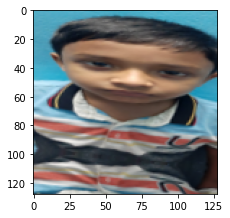

In [12]:
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/uji_Ahsan/Dataset/Normal_image_augmented/aug_33_2197.png')

#UJI COBA KLASIFIKASI 2

1/1 [==============================] - 1s 1s/step
prediction is Monkeypox_augmented


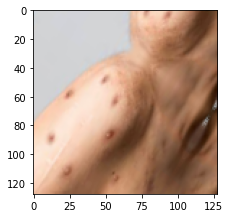

In [13]:
model_filepath =  '/content/drive/MyDrive/uji_Ahsan/' + "Model/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/uji_Ahsan/Dataset/Monkeypox_augmented/monkeypox_aug_26_5558.png')